Connected to data_prox (Python 3.8.19)

In [1]:
import numpy as np
import astra

def filter_sinogram(g):
    a, b = g.shape
    filter = np.append( np.linspace(np.pi, 0, b//2, endpoint=False), np.linspace(0, np.pi, b//2, endpoint=False) )
    filter = filter[None,:]
    gfilt = np.zeros_like(g, dtype="complex")
    for i in range(a):
        ghat = np.fft.fftshift(np.fft.fft(g[i,:]))/(2*g.shape[0])
        gfilt[i,:] = np.fft.ifft(np.fft.ifftshift(ghat* filter))# * filter)
    return np.real(gfilt)

def get_radon_operator(N1, N2, Ns, Nal, pixel_width=1):
    al = np.linspace(0., np.pi, Nal, endpoint=False)
    volumeGeometry = astra.create_vol_geom(N1, N2)
    projectionGeometry = astra.create_proj_geom('parallel', pixel_width, Ns, al)
    proj_id = astra.create_projector('line', projectionGeometry, volumeGeometry)
    A = astra.OpTomo(proj_id)
    return A, proj_id


def get_radon_matrix(N1, N2, Ns, Nal, pixel_width=1):
    _, proj_id = get_radon_operator(N1, N2, Ns, Nal, pixel_width=1)
    mat_id = astra.projector.matrix(proj_id)
    Amat = astra.matrix.get(mat_id)
    return Amat


index = 1
X = np.load(f'data/phantom/phantom_{str(index)}.npy')

import matplotlib.pyplot as plt

plt.imshow(X)

FileNotFoundError: [Errno 2] No such file or directory: 'data/phantom/phantom_1.npy'

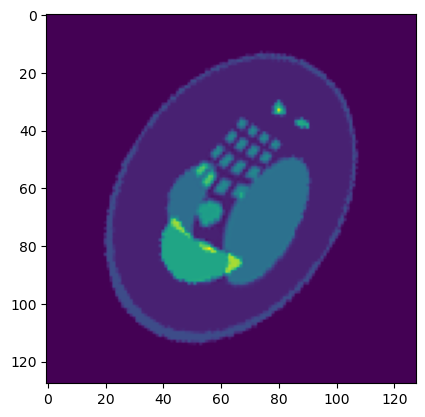

In [2]:
import numpy as np
import astra

def filter_sinogram(g):
    a, b = g.shape
    filter = np.append( np.linspace(np.pi, 0, b//2, endpoint=False), np.linspace(0, np.pi, b//2, endpoint=False) )
    filter = filter[None,:]
    gfilt = np.zeros_like(g, dtype="complex")
    for i in range(a):
        ghat = np.fft.fftshift(np.fft.fft(g[i,:]))/(2*g.shape[0])
        gfilt[i,:] = np.fft.ifft(np.fft.ifftshift(ghat* filter))# * filter)
    return np.real(gfilt)

def get_radon_operator(N1, N2, Ns, Nal, pixel_width=1):
    al = np.linspace(0., np.pi, Nal, endpoint=False)
    volumeGeometry = astra.create_vol_geom(N1, N2)
    projectionGeometry = astra.create_proj_geom('parallel', pixel_width, Ns, al)
    proj_id = astra.create_projector('line', projectionGeometry, volumeGeometry)
    A = astra.OpTomo(proj_id)
    return A, proj_id


def get_radon_matrix(N1, N2, Ns, Nal, pixel_width=1):
    _, proj_id = get_radon_operator(N1, N2, Ns, Nal, pixel_width=1)
    mat_id = astra.projector.matrix(proj_id)
    Amat = astra.matrix.get(mat_id)
    return Amat

index = 1
X = np.load(f'../data/phantom/phantom_{str(index)}.npy')

import matplotlib.pyplot as plt

plt.imshow(X)

In [3]:
X.shape

(128, 128)

TypeError: only size-1 arrays can be converted to Python scalars

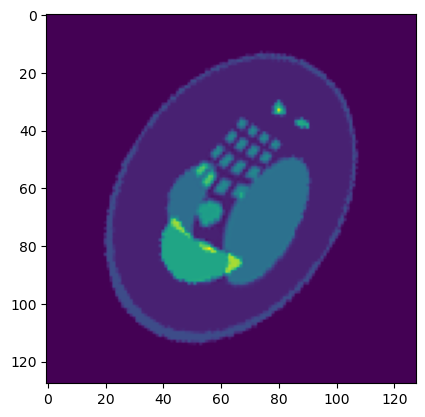

In [4]:
import numpy as np
import astra

def filter_sinogram(g):
    a, b = g.shape
    filter = np.append( np.linspace(np.pi, 0, b//2, endpoint=False), np.linspace(0, np.pi, b//2, endpoint=False) )
    filter = filter[None,:]
    gfilt = np.zeros_like(g, dtype="complex")
    for i in range(a):
        ghat = np.fft.fftshift(np.fft.fft(g[i,:]))/(2*g.shape[0])
        gfilt[i,:] = np.fft.ifft(np.fft.ifftshift(ghat* filter))# * filter)
    return np.real(gfilt)

def get_radon_operator(N1, N2, Ns, Nal, pixel_width=1):
    al = np.linspace(0., np.pi, Nal, endpoint=False)
    volumeGeometry = astra.create_vol_geom(N1, N2)
    projectionGeometry = astra.create_proj_geom('parallel', pixel_width, Ns, al)
    proj_id = astra.create_projector('line', projectionGeometry, volumeGeometry)
    A = astra.OpTomo(proj_id)
    return A, proj_id


def get_radon_matrix(N1, N2, Ns, Nal, pixel_width=1):
    _, proj_id = get_radon_operator(N1, N2, Ns, Nal, pixel_width=1)
    mat_id = astra.projector.matrix(proj_id)
    Amat = astra.matrix.get(mat_id)
    return Amat

index = 1
X = np.load(f'../data/phantom/phantom_{str(index)}.npy')

Ns = 200
Nal = 180
A = get_radon_matrix(X.shape[0], X.shape[1], Ns, Nal)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X)

g = A.dot(X.reshape(-1,1)).reshape(Nal, Ns)
plt.figure(g)

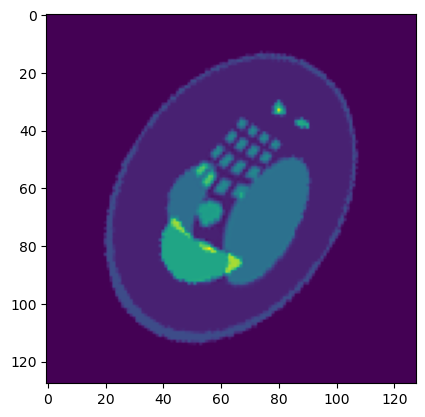

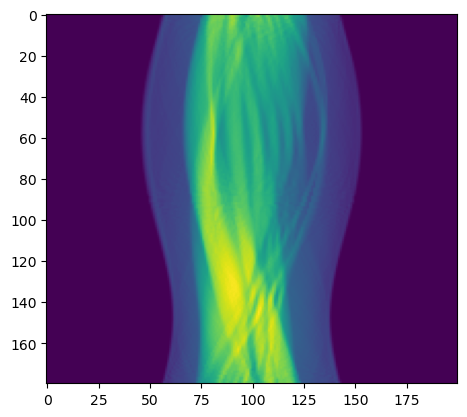

In [5]:
import numpy as np
import astra

def filter_sinogram(g):
    a, b = g.shape
    filter = np.append( np.linspace(np.pi, 0, b//2, endpoint=False), np.linspace(0, np.pi, b//2, endpoint=False) )
    filter = filter[None,:]
    gfilt = np.zeros_like(g, dtype="complex")
    for i in range(a):
        ghat = np.fft.fftshift(np.fft.fft(g[i,:]))/(2*g.shape[0])
        gfilt[i,:] = np.fft.ifft(np.fft.ifftshift(ghat* filter))# * filter)
    return np.real(gfilt)

def get_radon_operator(N1, N2, Ns, Nal, pixel_width=1):
    al = np.linspace(0., np.pi, Nal, endpoint=False)
    volumeGeometry = astra.create_vol_geom(N1, N2)
    projectionGeometry = astra.create_proj_geom('parallel', pixel_width, Ns, al)
    proj_id = astra.create_projector('line', projectionGeometry, volumeGeometry)
    A = astra.OpTomo(proj_id)
    return A, proj_id


def get_radon_matrix(N1, N2, Ns, Nal, pixel_width=1):
    _, proj_id = get_radon_operator(N1, N2, Ns, Nal, pixel_width=1)
    mat_id = astra.projector.matrix(proj_id)
    Amat = astra.matrix.get(mat_id)
    return Amat

index = 1
X = np.load(f'../data/phantom/phantom_{str(index)}.npy')

Ns = 200
Nal = 180
A = get_radon_matrix(X.shape[0], X.shape[1], Ns, Nal)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X)

g = A.dot(X.reshape(-1,1)).reshape(Nal, Ns)
plt.figure()
plt.imshow(g)

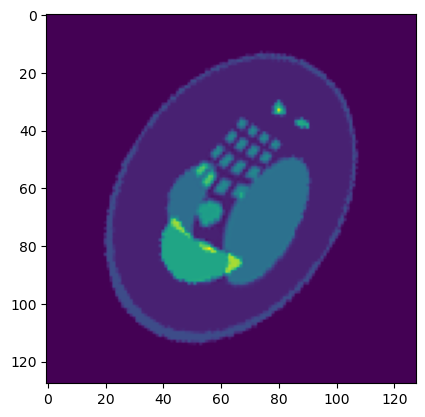

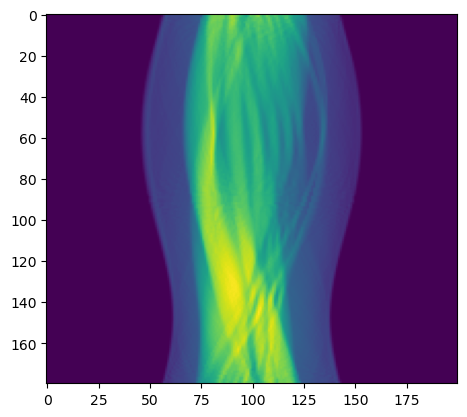

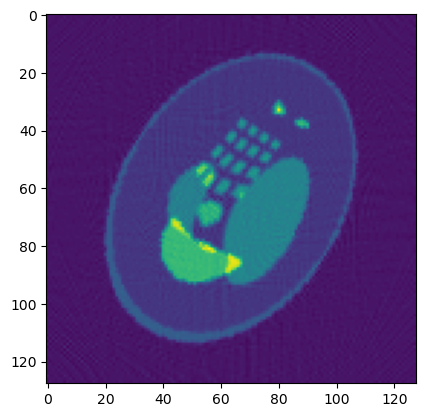

In [6]:
import numpy as np
import astra

def filter_sinogram(g):
    a, b = g.shape
    filter = np.append( np.linspace(np.pi, 0, b//2, endpoint=False), np.linspace(0, np.pi, b//2, endpoint=False) )
    filter = filter[None,:]
    gfilt = np.zeros_like(g, dtype="complex")
    for i in range(a):
        ghat = np.fft.fftshift(np.fft.fft(g[i,:]))/(2*g.shape[0])
        gfilt[i,:] = np.fft.ifft(np.fft.ifftshift(ghat* filter))# * filter)
    return np.real(gfilt)

def get_radon_operator(N1, N2, Ns, Nal, pixel_width=1):
    al = np.linspace(0., np.pi, Nal, endpoint=False)
    volumeGeometry = astra.create_vol_geom(N1, N2)
    projectionGeometry = astra.create_proj_geom('parallel', pixel_width, Ns, al)
    proj_id = astra.create_projector('line', projectionGeometry, volumeGeometry)
    A = astra.OpTomo(proj_id)
    return A, proj_id


def get_radon_matrix(N1, N2, Ns, Nal, pixel_width=1):
    _, proj_id = get_radon_operator(N1, N2, Ns, Nal, pixel_width=1)
    mat_id = astra.projector.matrix(proj_id)
    Amat = astra.matrix.get(mat_id)
    return Amat

index = 1
X = np.load(f'../data/phantom/phantom_{str(index)}.npy')

Ns = 200
Nal = 180
A = get_radon_matrix(X.shape[0], X.shape[1], Ns, Nal)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X)

g = A.dot(X.reshape(-1, 1)).reshape(Nal, Ns)
plt.figure()
plt.imshow(g)

gfilt = filter_sinogram(g)

rec = A.T.dot(gfilt.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])

plt.figure()
plt.imshow(rec)

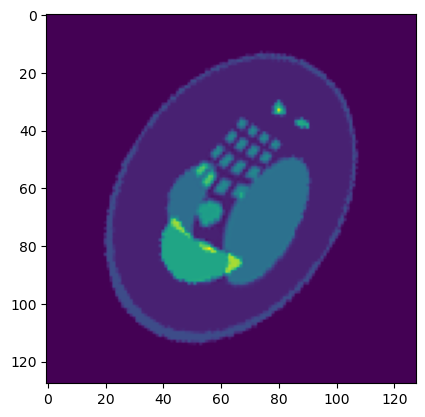

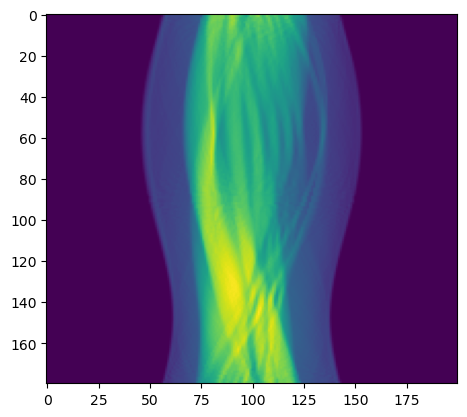

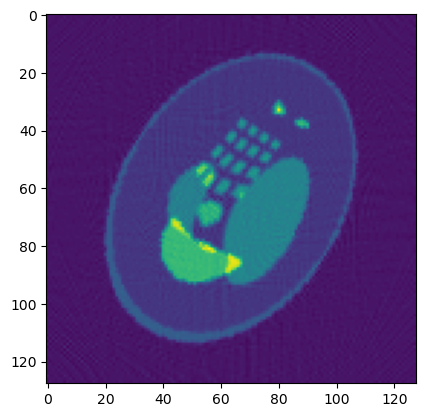

In [7]:
import numpy as np
import astra

def filter_sinogram(g):
    a, b = g.shape
    filter = np.append( np.linspace(np.pi, 0, b//2, endpoint=False), np.linspace(0, np.pi, b//2, endpoint=False) )
    filter = filter[None,:]
    gfilt = np.zeros_like(g, dtype="complex")
    for i in range(a):
        ghat = np.fft.fftshift(np.fft.fft(g[i,:]))/(2*g.shape[0])
        gfilt[i,:] = np.fft.ifft(np.fft.ifftshift(ghat* filter))# * filter)
    return np.real(gfilt)

def get_radon_operator(N1, N2, Ns, al, pixel_width=1):
    volumeGeometry = astra.create_vol_geom(N1, N2)
    projectionGeometry = astra.create_proj_geom('parallel', pixel_width, Ns, al)
    proj_id = astra.create_projector('line', projectionGeometry, volumeGeometry)
    A = astra.OpTomo(proj_id)
    return A, proj_id


def get_radon_matrix(N1, N2, Ns, Nal, pixel_width=1):
    _, proj_id = get_radon_operator(N1, N2, Ns, Nal, pixel_width=1)
    mat_id = astra.projector.matrix(proj_id)
    Amat = astra.matrix.get(mat_id)
    return Amat

index = 1
X = np.load(f'../data/phantom/phantom_{str(index)}.npy')

Ns = 200
Nal = 180
al = np.linspace(0., np.pi, Nal, endpoint=False)
A = get_radon_matrix(X.shape[0], X.shape[1], Ns, al)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X)

g = A.dot(X.reshape(-1, 1)).reshape(Nal, Ns)
plt.figure()
plt.imshow(g)

gfilt = filter_sinogram(g)

rec = A.T.dot(gfilt.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])

plt.figure()
plt.imshow(rec)

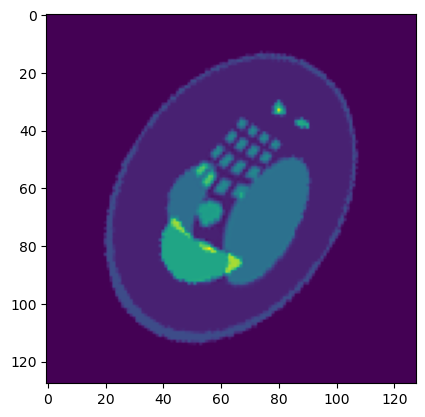

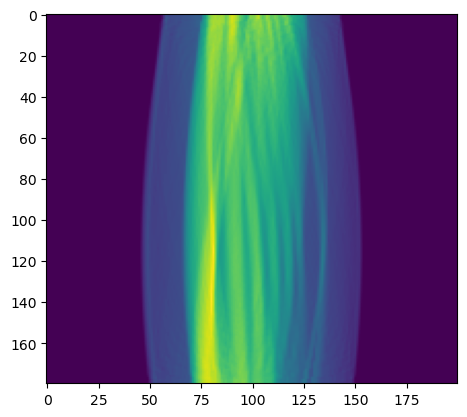

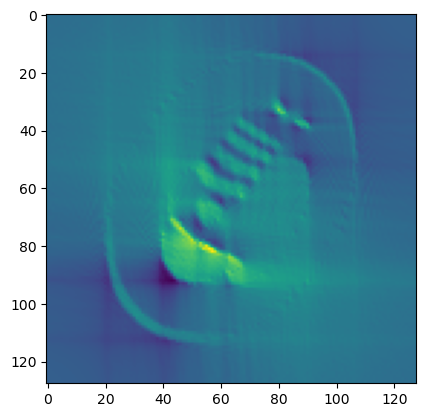

In [8]:
import numpy as np
import astra

def filter_sinogram(g):
    a, b = g.shape
    filter = np.append( np.linspace(np.pi, 0, b//2, endpoint=False), np.linspace(0, np.pi, b//2, endpoint=False) )
    filter = filter[None,:]
    gfilt = np.zeros_like(g, dtype="complex")
    for i in range(a):
        ghat = np.fft.fftshift(np.fft.fft(g[i,:]))/(2*g.shape[0])
        gfilt[i,:] = np.fft.ifft(np.fft.ifftshift(ghat* filter))# * filter)
    return np.real(gfilt)

def get_radon_operator(N1, N2, Ns, al, pixel_width=1):
    volumeGeometry = astra.create_vol_geom(N1, N2)
    projectionGeometry = astra.create_proj_geom('parallel', pixel_width, Ns, al)
    proj_id = astra.create_projector('line', projectionGeometry, volumeGeometry)
    A = astra.OpTomo(proj_id)
    return A, proj_id


def get_radon_matrix(N1, N2, Ns, Nal, pixel_width=1):
    _, proj_id = get_radon_operator(N1, N2, Ns, Nal, pixel_width=1)
    mat_id = astra.projector.matrix(proj_id)
    Amat = astra.matrix.get(mat_id)
    return Amat

index = 1
X = np.load(f'../data/phantom/phantom_{str(index)}.npy')

Ns = 200
Nal = 180
al = np.linspace(0., np.pi/2, Nal, endpoint=False)
A = get_radon_matrix(X.shape[0], X.shape[1], Ns, al)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X)

g = A.dot(X.reshape(-1, 1)).reshape(Nal, Ns)
plt.figure()
plt.imshow(g)

gfilt = filter_sinogram(g)

rec = A.T.dot(gfilt.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])

plt.figure()
plt.imshow(rec)

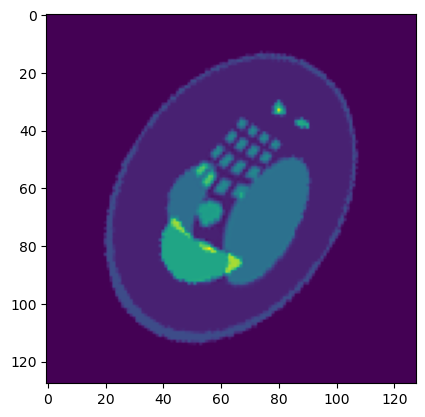

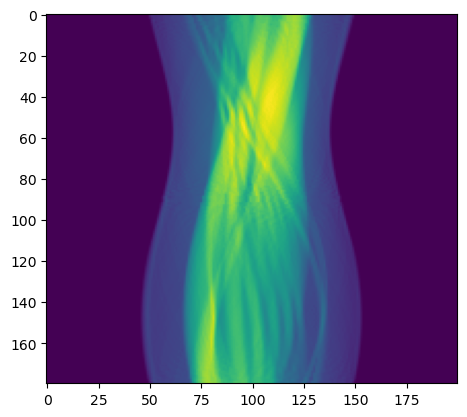

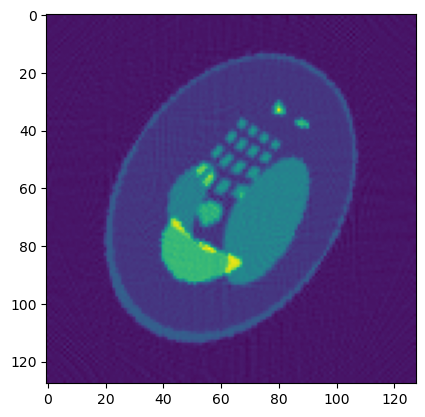

In [9]:
import numpy as np
import astra

def filter_sinogram(g):
    a, b = g.shape
    filter = np.append( np.linspace(np.pi, 0, b//2, endpoint=False), np.linspace(0, np.pi, b//2, endpoint=False) )
    filter = filter[None,:]
    gfilt = np.zeros_like(g, dtype="complex")
    for i in range(a):
        ghat = np.fft.fftshift(np.fft.fft(g[i,:]))/(2*g.shape[0])
        gfilt[i,:] = np.fft.ifft(np.fft.ifftshift(ghat* filter))# * filter)
    return np.real(gfilt)

def get_radon_operator(N1, N2, Ns, al, pixel_width=1):
    volumeGeometry = astra.create_vol_geom(N1, N2)
    projectionGeometry = astra.create_proj_geom('parallel', pixel_width, Ns, al)
    proj_id = astra.create_projector('line', projectionGeometry, volumeGeometry)
    A = astra.OpTomo(proj_id)
    return A, proj_id


def get_radon_matrix(N1, N2, Ns, Nal, pixel_width=1):
    _, proj_id = get_radon_operator(N1, N2, Ns, Nal, pixel_width=1)
    mat_id = astra.projector.matrix(proj_id)
    Amat = astra.matrix.get(mat_id)
    return Amat

index = 1
X = np.load(f'../data/phantom/phantom_{str(index)}.npy')

Ns = 200
Nal = 180
al = np.linspace(-np.pi/2, np.pi/2, Nal, endpoint=False)
A = get_radon_matrix(X.shape[0], X.shape[1], Ns, al)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X)

g = A.dot(X.reshape(-1, 1)).reshape(Nal, Ns)
plt.figure()
plt.imshow(g)

gfilt = filter_sinogram(g)

rec = A.T.dot(gfilt.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])

plt.figure()
plt.imshow(rec)

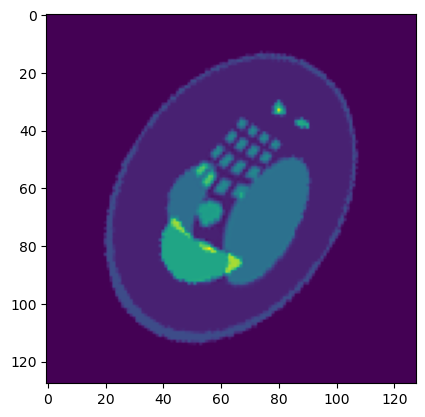

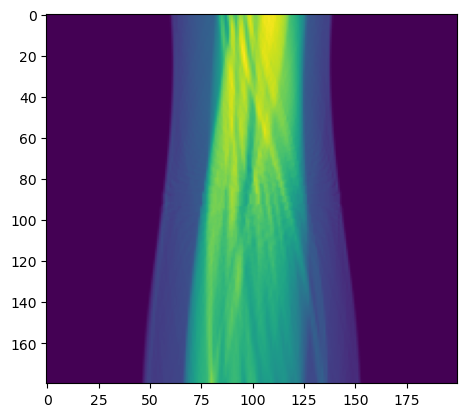

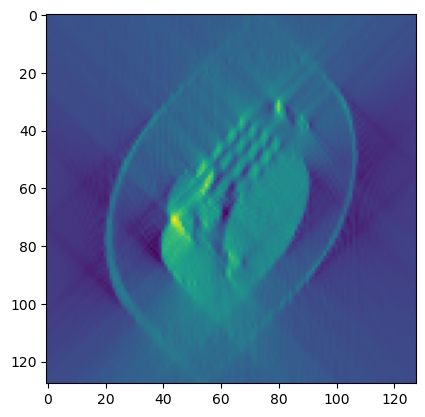

In [10]:
import numpy as np
import astra

def filter_sinogram(g):
    a, b = g.shape
    filter = np.append( np.linspace(np.pi, 0, b//2, endpoint=False), np.linspace(0, np.pi, b//2, endpoint=False) )
    filter = filter[None,:]
    gfilt = np.zeros_like(g, dtype="complex")
    for i in range(a):
        ghat = np.fft.fftshift(np.fft.fft(g[i,:]))/(2*g.shape[0])
        gfilt[i,:] = np.fft.ifft(np.fft.ifftshift(ghat* filter))# * filter)
    return np.real(gfilt)

def get_radon_operator(N1, N2, Ns, al, pixel_width=1):
    volumeGeometry = astra.create_vol_geom(N1, N2)
    projectionGeometry = astra.create_proj_geom('parallel', pixel_width, Ns, al)
    proj_id = astra.create_projector('line', projectionGeometry, volumeGeometry)
    A = astra.OpTomo(proj_id)
    return A, proj_id


def get_radon_matrix(N1, N2, Ns, Nal, pixel_width=1):
    _, proj_id = get_radon_operator(N1, N2, Ns, Nal, pixel_width=1)
    mat_id = astra.projector.matrix(proj_id)
    Amat = astra.matrix.get(mat_id)
    return Amat

index = 1
X = np.load(f'../data/phantom/phantom_{str(index)}.npy')

Ns = 200
Nal = 180
al = np.linspace(-np.pi/4, np.pi/4, Nal, endpoint=False)
A = get_radon_matrix(X.shape[0], X.shape[1], Ns, al)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X)

g = A.dot(X.reshape(-1, 1)).reshape(Nal, Ns)
plt.figure()
plt.imshow(g)

gfilt = filter_sinogram(g)

rec = A.T.dot(gfilt.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])

plt.figure()
plt.imshow(rec)

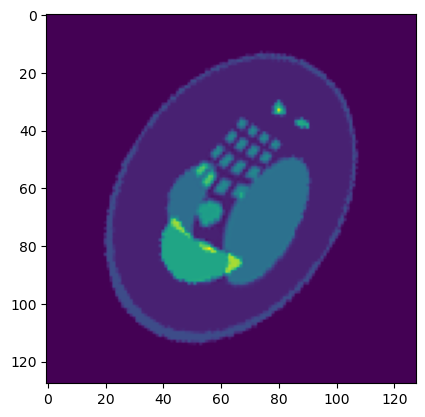

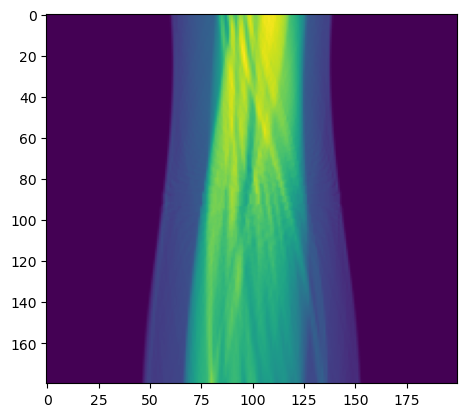

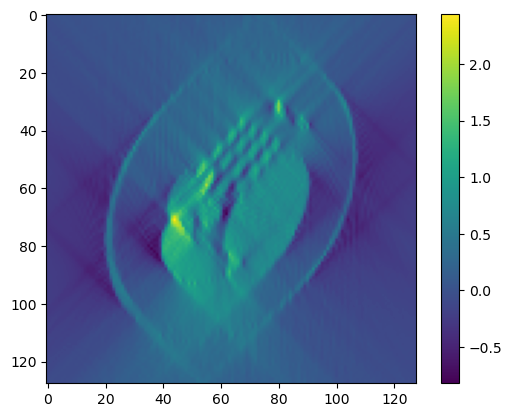

In [11]:
import numpy as np
import astra

def filter_sinogram(g):
    a, b = g.shape
    filter = np.append( np.linspace(np.pi, 0, b//2, endpoint=False), np.linspace(0, np.pi, b//2, endpoint=False) )
    filter = filter[None,:]
    gfilt = np.zeros_like(g, dtype="complex")
    for i in range(a):
        ghat = np.fft.fftshift(np.fft.fft(g[i,:]))/(2*g.shape[0])
        gfilt[i,:] = np.fft.ifft(np.fft.ifftshift(ghat* filter))# * filter)
    return np.real(gfilt)

def get_radon_operator(N1, N2, Ns, al, pixel_width=1):
    volumeGeometry = astra.create_vol_geom(N1, N2)
    projectionGeometry = astra.create_proj_geom('parallel', pixel_width, Ns, al)
    proj_id = astra.create_projector('line', projectionGeometry, volumeGeometry)
    A = astra.OpTomo(proj_id)
    return A, proj_id


def get_radon_matrix(N1, N2, Ns, Nal, pixel_width=1):
    _, proj_id = get_radon_operator(N1, N2, Ns, Nal, pixel_width=1)
    mat_id = astra.projector.matrix(proj_id)
    Amat = astra.matrix.get(mat_id)
    return Amat

index = 1
X = np.load(f'../data/phantom/phantom_{str(index)}.npy')

Ns = 200
Nal = 180
al = np.linspace(-np.pi/4, np.pi/4, Nal, endpoint=False)
A1 = get_radon_matrix(X.shape[0], X.shape[1], Ns, al)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X)

g1 = A1.dot(X.reshape(-1, 1)).reshape(Nal, Ns)
g2 = A1.dot(X.reshape(-1, 1)).reshape(Nal, Ns)

plt.figure()
plt.imshow(g1)

gfilt1 = filter_sinogram(g1)
gfilt2 = filter_sinogram(g2)

rec1 = A1.T.dot(gfilt1.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])
rec2 = A1.T.dot(gfilt2.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])

plt.figure()
plt.imshow(rec1 + rec2)
plt.colorbar()

NameError: name 'A2' is not defined

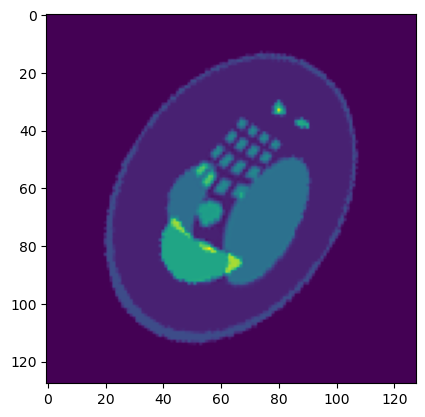

In [12]:
import numpy as np
import astra

def filter_sinogram(g):
    a, b = g.shape
    filter = np.append( np.linspace(np.pi, 0, b//2, endpoint=False), np.linspace(0, np.pi, b//2, endpoint=False) )
    filter = filter[None,:]
    gfilt = np.zeros_like(g, dtype="complex")
    for i in range(a):
        ghat = np.fft.fftshift(np.fft.fft(g[i,:]))/(2*g.shape[0])
        gfilt[i,:] = np.fft.ifft(np.fft.ifftshift(ghat* filter))# * filter)
    return np.real(gfilt)

def get_radon_operator(N1, N2, Ns, al, pixel_width=1):
    volumeGeometry = astra.create_vol_geom(N1, N2)
    projectionGeometry = astra.create_proj_geom('parallel', pixel_width, Ns, al)
    proj_id = astra.create_projector('line', projectionGeometry, volumeGeometry)
    A = astra.OpTomo(proj_id)
    return A, proj_id


def get_radon_matrix(N1, N2, Ns, Nal, pixel_width=1):
    _, proj_id = get_radon_operator(N1, N2, Ns, Nal, pixel_width=1)
    mat_id = astra.projector.matrix(proj_id)
    Amat = astra.matrix.get(mat_id)
    return Amat

index = 1
X = np.load(f'../data/phantom/phantom_{str(index)}.npy')

Ns = 200
Nal = 180
al = np.linspace(-np.pi/4, np.pi/4, Nal, endpoint=False)
A1 = get_radon_matrix(X.shape[0], X.shape[1], Ns, al)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X)

g1 = A1.dot(X.reshape(-1, 1)).reshape(Nal, Ns)
g2 = A2.dot(X.reshape(-1, 1)).reshape(Nal, Ns)

plt.figure()
plt.imshow(g1)

gfilt1 = filter_sinogram(g1)
gfilt2 = filter_sinogram(g2)

rec1 = A1.T.dot(gfilt1.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])
rec2 = A1.T.dot(gfilt2.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])

plt.figure()
plt.imshow(rec1 + rec2)
plt.colorbar()

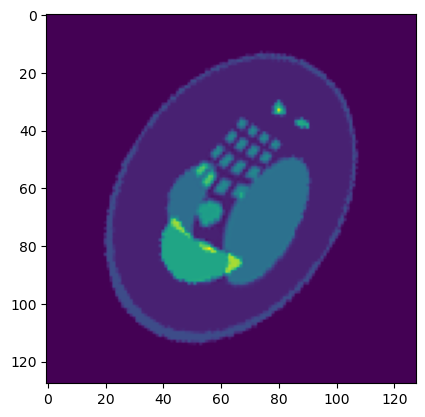

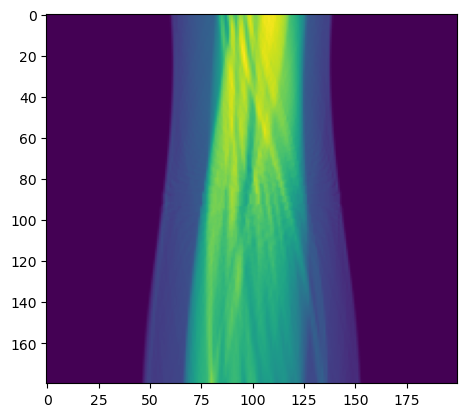

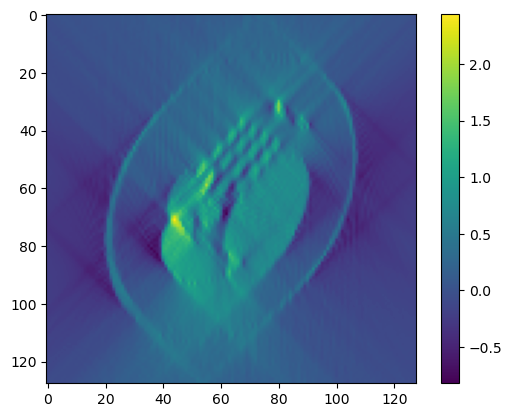

In [13]:
import numpy as np
import astra

def filter_sinogram(g):
    a, b = g.shape
    filter = np.append( np.linspace(np.pi, 0, b//2, endpoint=False), np.linspace(0, np.pi, b//2, endpoint=False) )
    filter = filter[None,:]
    gfilt = np.zeros_like(g, dtype="complex")
    for i in range(a):
        ghat = np.fft.fftshift(np.fft.fft(g[i,:]))/(2*g.shape[0])
        gfilt[i,:] = np.fft.ifft(np.fft.ifftshift(ghat* filter))# * filter)
    return np.real(gfilt)

def get_radon_operator(N1, N2, Ns, al, pixel_width=1):
    volumeGeometry = astra.create_vol_geom(N1, N2)
    projectionGeometry = astra.create_proj_geom('parallel', pixel_width, Ns, al)
    proj_id = astra.create_projector('line', projectionGeometry, volumeGeometry)
    A = astra.OpTomo(proj_id)
    return A, proj_id


def get_radon_matrix(N1, N2, Ns, Nal, pixel_width=1):
    _, proj_id = get_radon_operator(N1, N2, Ns, Nal, pixel_width=1)
    mat_id = astra.projector.matrix(proj_id)
    Amat = astra.matrix.get(mat_id)
    return Amat

index = 1
X = np.load(f'../data/phantom/phantom_{str(index)}.npy')

Ns = 200
Nal = 180
al_full = np.linspace(-np.pi/2, np.pi/2, Nal, endpoint=False)
al1 = np.linspace(-np.pi/4, np.pi/4, Nal, endpoint=False)
al2 = al_full - al1
A1 = get_radon_matrix(X.shape[0], X.shape[1], Ns, al1)
A2 = get_radon_matrix(X.shape[0], X.shape[1], Ns, al2)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X)

g1 = A1.dot(X.reshape(-1, 1)).reshape(Nal, Ns)
g2 = A2.dot(X.reshape(-1, 1)).reshape(Nal, Ns)

plt.figure()
plt.imshow(g1)

gfilt1 = filter_sinogram(g1)
gfilt2 = filter_sinogram(g2)

rec1 = A1.T.dot(gfilt1.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])
rec2 = A1.T.dot(gfilt2.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])

plt.figure()
plt.imshow(rec1 + rec2)
plt.colorbar()

In [14]:
al1

array([-0.78539816, -0.77667152, -0.76794487, -0.75921822, -0.75049158,
       -0.74176493, -0.73303829, -0.72431164, -0.71558499, -0.70685835,
       -0.6981317 , -0.68940505, -0.68067841, -0.67195176, -0.66322512,
       -0.65449847, -0.64577182, -0.63704518, -0.62831853, -0.61959188,
       -0.61086524, -0.60213859, -0.59341195, -0.5846853 , -0.57595865,
       -0.56723201, -0.55850536, -0.54977871, -0.54105207, -0.53232542,
       -0.52359878, -0.51487213, -0.50614548, -0.49741884, -0.48869219,
       -0.47996554, -0.4712389 , -0.46251225, -0.45378561, -0.44505896,
       -0.43633231, -0.42760567, -0.41887902, -0.41015237, -0.40142573,
       -0.39269908, -0.38397244, -0.37524579, -0.36651914, -0.3577925 ,
       -0.34906585, -0.3403392 , -0.33161256, -0.32288591, -0.31415927,
       -0.30543262, -0.29670597, -0.28797933, -0.27925268, -0.27052603,
       -0.26179939, -0.25307274, -0.2443461 , -0.23561945, -0.2268928 ,
       -0.21816616, -0.20943951, -0.20071286, -0.19198622, -0.18

In [15]:
al2

array([-0.78539816, -0.77667152, -0.76794487, -0.75921822, -0.75049158,
       -0.74176493, -0.73303829, -0.72431164, -0.71558499, -0.70685835,
       -0.6981317 , -0.68940505, -0.68067841, -0.67195176, -0.66322512,
       -0.65449847, -0.64577182, -0.63704518, -0.62831853, -0.61959188,
       -0.61086524, -0.60213859, -0.59341195, -0.5846853 , -0.57595865,
       -0.56723201, -0.55850536, -0.54977871, -0.54105207, -0.53232542,
       -0.52359878, -0.51487213, -0.50614548, -0.49741884, -0.48869219,
       -0.47996554, -0.4712389 , -0.46251225, -0.45378561, -0.44505896,
       -0.43633231, -0.42760567, -0.41887902, -0.41015237, -0.40142573,
       -0.39269908, -0.38397244, -0.37524579, -0.36651914, -0.3577925 ,
       -0.34906585, -0.3403392 , -0.33161256, -0.32288591, -0.31415927,
       -0.30543262, -0.29670597, -0.28797933, -0.27925268, -0.27052603,
       -0.26179939, -0.25307274, -0.2443461 , -0.23561945, -0.2268928 ,
       -0.21816616, -0.20943951, -0.20071286, -0.19198622, -0.18

ValueError: cannot reshape array of size 18200 into shape (180,200)

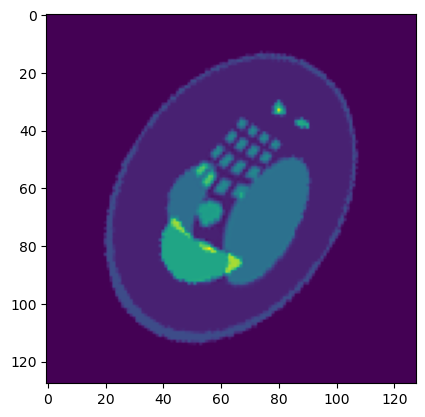

In [16]:
import numpy as np
import astra

def filter_sinogram(g):
    a, b = g.shape
    filter = np.append( np.linspace(np.pi, 0, b//2, endpoint=False), np.linspace(0, np.pi, b//2, endpoint=False) )
    filter = filter[None,:]
    gfilt = np.zeros_like(g, dtype="complex")
    for i in range(a):
        ghat = np.fft.fftshift(np.fft.fft(g[i,:]))/(2*g.shape[0])
        gfilt[i,:] = np.fft.ifft(np.fft.ifftshift(ghat* filter))# * filter)
    return np.real(gfilt)

def get_radon_operator(N1, N2, Ns, al, pixel_width=1):
    volumeGeometry = astra.create_vol_geom(N1, N2)
    projectionGeometry = astra.create_proj_geom('parallel', pixel_width, Ns, al)
    proj_id = astra.create_projector('line', projectionGeometry, volumeGeometry)
    A = astra.OpTomo(proj_id)
    return A, proj_id


def get_radon_matrix(N1, N2, Ns, Nal, pixel_width=1):
    _, proj_id = get_radon_operator(N1, N2, Ns, Nal, pixel_width=1)
    mat_id = astra.projector.matrix(proj_id)
    Amat = astra.matrix.get(mat_id)
    return Amat

index = 1
X = np.load(f'../data/phantom/phantom_{str(index)}.npy')

Ns = 200
Nal = 180
al_full = np.linspace(-np.pi/2, np.pi/2, Nal, endpoint=False)
al1 = al_full[np.abs(al_full)<=np.pi/4]
al2 = al_full[np.abs(al_full)>np.pi/4]
A1 = get_radon_matrix(X.shape[0], X.shape[1], Ns, al1)
A2 = get_radon_matrix(X.shape[0], X.shape[1], Ns, al2)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X)

g1 = A1.dot(X.reshape(-1, 1)).reshape(Nal, Ns)
g2 = A2.dot(X.reshape(-1, 1)).reshape(Nal, Ns)

plt.figure()
plt.imshow(g1)

gfilt1 = filter_sinogram(g1)
gfilt2 = filter_sinogram(g2)

rec1 = A1.T.dot(gfilt1.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])
rec2 = A1.T.dot(gfilt2.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])

plt.figure()
plt.imshow(rec1 + rec2)
plt.colorbar()

ValueError: dimension mismatch

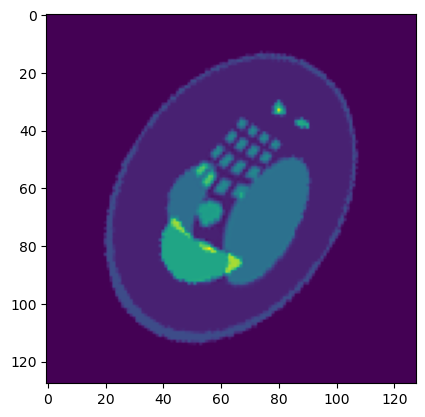

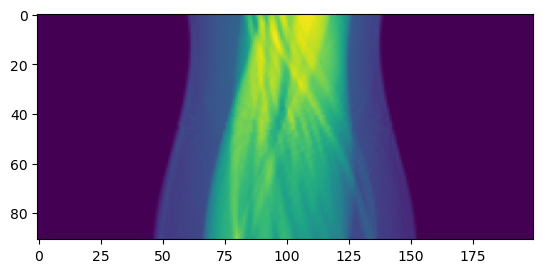

In [17]:
import numpy as np
import astra

def filter_sinogram(g):
    a, b = g.shape
    filter = np.append( np.linspace(np.pi, 0, b//2, endpoint=False), np.linspace(0, np.pi, b//2, endpoint=False) )
    filter = filter[None,:]
    gfilt = np.zeros_like(g, dtype="complex")
    for i in range(a):
        ghat = np.fft.fftshift(np.fft.fft(g[i,:]))/(2*g.shape[0])
        gfilt[i,:] = np.fft.ifft(np.fft.ifftshift(ghat* filter))# * filter)
    return np.real(gfilt)

def get_radon_operator(N1, N2, Ns, al, pixel_width=1):
    volumeGeometry = astra.create_vol_geom(N1, N2)
    projectionGeometry = astra.create_proj_geom('parallel', pixel_width, Ns, al)
    proj_id = astra.create_projector('line', projectionGeometry, volumeGeometry)
    A = astra.OpTomo(proj_id)
    return A, proj_id


def get_radon_matrix(N1, N2, Ns, Nal, pixel_width=1):
    _, proj_id = get_radon_operator(N1, N2, Ns, Nal, pixel_width=1)
    mat_id = astra.projector.matrix(proj_id)
    Amat = astra.matrix.get(mat_id)
    return Amat

index = 1
X = np.load(f'../data/phantom/phantom_{str(index)}.npy')

Ns = 200
Nal = 180
al_full = np.linspace(-np.pi/2, np.pi/2, Nal, endpoint=False)
al1 = al_full[np.abs(al_full)<=np.pi/4]
al2 = al_full[np.abs(al_full)>np.pi/4]

Nal1 = len(al1)
Nal2 = len(al2)

A1 = get_radon_matrix(X.shape[0], X.shape[1], Ns, al1)
A2 = get_radon_matrix(X.shape[0], X.shape[1], Ns, al2)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X)

g1 = A1.dot(X.reshape(-1, 1)).reshape(Nal1, Ns)
g2 = A2.dot(X.reshape(-1, 1)).reshape(Nal2, Ns)

plt.figure()
plt.imshow(g1)

gfilt1 = filter_sinogram(g1)
gfilt2 = filter_sinogram(g2)

rec1 = A1.T.dot(gfilt1.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])
rec2 = A1.T.dot(gfilt2.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])

plt.figure()
plt.imshow(rec1 + rec2)
plt.colorbar()

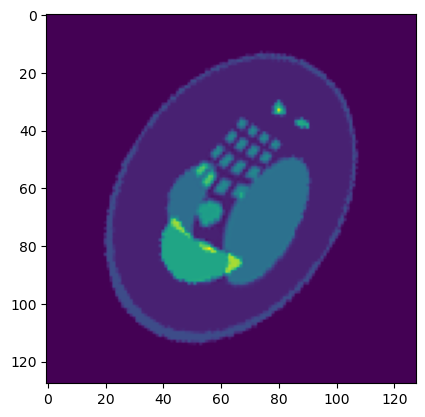

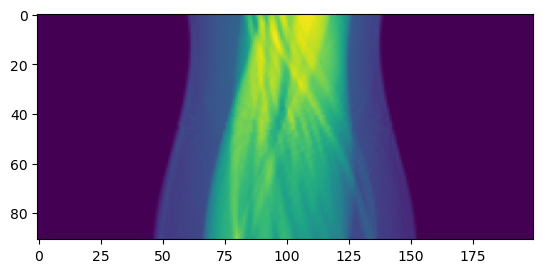

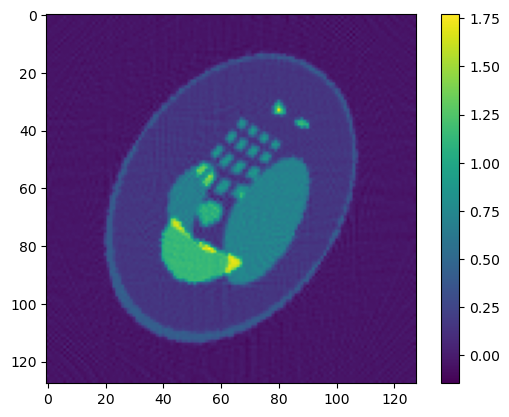

In [18]:
import numpy as np
import astra

def filter_sinogram(g):
    a, b = g.shape
    filter = np.append( np.linspace(np.pi, 0, b//2, endpoint=False), np.linspace(0, np.pi, b//2, endpoint=False) )
    filter = filter[None,:]
    gfilt = np.zeros_like(g, dtype="complex")
    for i in range(a):
        ghat = np.fft.fftshift(np.fft.fft(g[i,:]))/(2*g.shape[0])
        gfilt[i,:] = np.fft.ifft(np.fft.ifftshift(ghat* filter))# * filter)
    return np.real(gfilt)

def get_radon_operator(N1, N2, Ns, al, pixel_width=1):
    volumeGeometry = astra.create_vol_geom(N1, N2)
    projectionGeometry = astra.create_proj_geom('parallel', pixel_width, Ns, al)
    proj_id = astra.create_projector('line', projectionGeometry, volumeGeometry)
    A = astra.OpTomo(proj_id)
    return A, proj_id


def get_radon_matrix(N1, N2, Ns, Nal, pixel_width=1):
    _, proj_id = get_radon_operator(N1, N2, Ns, Nal, pixel_width=1)
    mat_id = astra.projector.matrix(proj_id)
    Amat = astra.matrix.get(mat_id)
    return Amat

index = 1
X = np.load(f'../data/phantom/phantom_{str(index)}.npy')

Ns = 200
Nal = 180
al_full = np.linspace(-np.pi/2, np.pi/2, Nal, endpoint=False)
al1 = al_full[np.abs(al_full)<=np.pi/4]
al2 = al_full[np.abs(al_full)>np.pi/4]

Nal1 = len(al1)
Nal2 = len(al2)

A1 = get_radon_matrix(X.shape[0], X.shape[1], Ns, al1)
A2 = get_radon_matrix(X.shape[0], X.shape[1], Ns, al2)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X)

g1 = A1.dot(X.reshape(-1, 1)).reshape(Nal1, Ns)
g2 = A2.dot(X.reshape(-1, 1)).reshape(Nal2, Ns)

plt.figure()
plt.imshow(g1)

gfilt1 = filter_sinogram(g1)
gfilt2 = filter_sinogram(g2)

rec1 = A1.T.dot(gfilt1.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])
rec2 = A2.T.dot(gfilt2.reshape(-1, 1)).reshape(X.shape[0], X.shape[1])

plt.figure()
plt.imshow(rec1 + rec2)
plt.colorbar()